In [6]:
import numpy as np
import pandas as pd
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Assignment 2 Part 1

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
print("Shape of the CSV file:", df.shape)
df.head()

Shape of the CSV file: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
column1 = df['Age'].values
column2 = df['EstimatedSalary'].values
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
column3 = df['Gender'].values
X = np.column_stack((column3,column1,column2))
y = df['Purchased'].values
print(X)


[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# logistic regression from scratch

def sigmoid(z):
    if(z<-50):g=0
    else:g=1/(1+np.exp(-z))
    return g

def compute_cost(X, y, w, b):
    m,n = X.shape
    cost=0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        epsilon = 1e-15
        cost += -y[i] * np.log(f_wb_i + epsilon) - (1 - y[i]) * np.log(1 - f_wb_i + epsilon)
        total_cost = (cost) / m
    return total_cost

def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i  = f_wb_i  - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i

    dj_dw =dj_dw/m
    dj_db =dj_db/m

    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m = len(X)

    J_history = []
    w_history = []

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i<100000:
            cost =  cost_function(X, y, w_in, b_in)
            J_history.append(cost)

    return w_in, b_in, J_history, w_history

def predict(X, w, b):

    m, n = X.shape
    p = np.zeros(m)
    for i in range(m):
        z_wb = 0

        for j in range(n):

            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij

        z_wb += b
        f_wb = sigmoid(z_wb)
        p[i]=f_wb>=0.5

    return p


In [11]:
# accuracy of logistic regression from scratch

np.random.seed(1)
initial_w = 0.01 * (np.random.rand(3) - 0.5)
initial_b = -8

iterations = 1000
alpha = 0.01
w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,
                                  compute_cost, compute_gradient, alpha, iterations)

p1 = predict(X_test, w,b)
print(' Accuracy_scratch_raw_data: %f'%(np.mean(p1 == y_test) * 100))

def min_max_scaling(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_normalized = (X - min_vals) / (max_vals - min_vals)
    return X_normalized

X_train_normalized = min_max_scaling(X_train)
X_test_normalized = min_max_scaling(X_test)
alpha_ = 0.05
w_n,b_n, J_history,_ = gradient_descent(X_train_normalized ,y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, alpha_, iterations)

p2 = predict(X_test_normalized, w_n,b_n)
print(' Accuracy_scratch_normalized_data: %f'%(np.mean(p2 == y_test) * 100))

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

alpha = 0.02
w_s,b_s, J_history,_ = gradient_descent(X_train_standardized ,y_train, initial_w, initial_b,
                                  compute_cost, compute_gradient, alpha, iterations)

p3 = predict(X_test_standardized, w_s,b_s)
print(' Accuracy_scratch_standardized_data: %f'%(np.mean(p3 == y_test) * 100))


 Accuracy_scratch_raw_data: 39.166667
 Accuracy_scratch_normalized_data: 81.666667
 Accuracy_scratch_standardized_data: 80.833333


In [12]:
# logistic regression using sk learn
# and its accuracy
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy_sklearn_raw_data: {accuracy*100}")

def min_max_scaling(X):
    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    X_normalized = (X - min_vals) / (max_vals - min_vals)
    return X_normalized

X_train_normalized = min_max_scaling(X_train)
X_test_normalized = min_max_scaling(X_test)

model_sk_n = LogisticRegression()
model_sk_n.fit(X_train_normalized, y_train)
test_acc_sklearn_normalized = model_sk_n.score(X_test_normalized, y_test)
print(f" Accuracy_sklearn_normalized_data: {test_acc_sklearn_normalized*100}")

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

model_stand = LogisticRegression()
model_stand.fit(X_train_standardized, y_train)
test_acc_sklearn_stand = model_sk_n.score(X_test_standardized, y_test)
print(f" Accuracy_sklearn_standardized_data: {test_acc_sklearn_stand*100}")

 Accuracy_sklearn_raw_data: 60.83333333333333
 Accuracy_sklearn_normalized_data: 84.16666666666667
 Accuracy_sklearn_standardized_data: 80.83333333333333


# New Section

Assignment 2 Part 2

In [13]:
data = pd.read_csv('Iris.csv')
print("Shape of the CSV file:", data.shape)
data.head()

Shape of the CSV file: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
Species = list(set(data["Species"]))
Specie1 = data[data["Species"]==Species[0]]
Specie2 = data[data["Species"]==Species[1]]
Specie3 = data[data["Species"]==Species[2]]

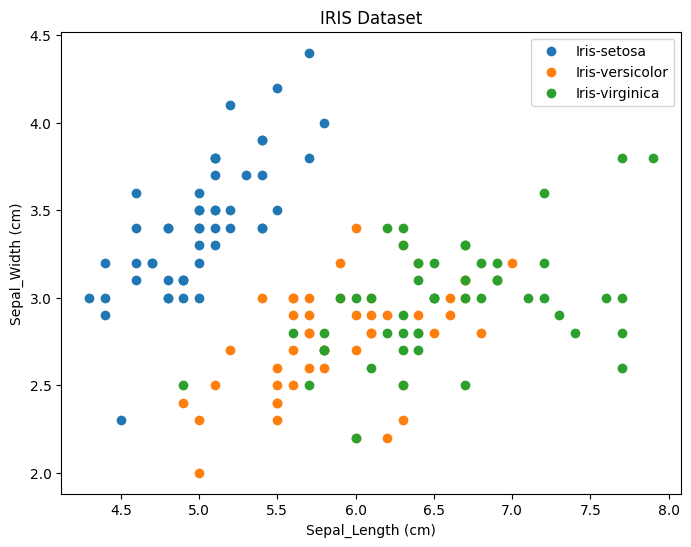

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(Specie1["SepalLengthCm"],Specie1["SepalWidthCm"], label='Iris-setosa')
plt.scatter(Specie2["SepalLengthCm"],Specie2["SepalWidthCm"], label='Iris-versicolor')
plt.scatter(Specie3["SepalLengthCm"],Specie3["SepalWidthCm"], label='Iris-virginica')
plt.xlabel('Sepal_Length (cm)')
plt.ylabel('Sepal_Width (cm)')
plt.title('IRIS Dataset')
plt.legend()
plt.show()

In [16]:
column1 = data['SepalLengthCm'].values
column2 = data['SepalWidthCm'].values
X = np.column_stack((column1,column2))
y = data['Species'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# KNN from scratch
def euclidean_distance(x_test, x_train):
  return np.sqrt(np.sum((x_test - x_train) ** 2))

def predict_knn(X_train, y_train, x_test, k=3):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train[i]))
    distances = sorted(distances)[:k]
    labels = [distance[1] for distance in distances]
    prediction = max(set(labels), key=labels.count)
    return prediction


Best k: 7
Accuracy (scratch) 80.0%.


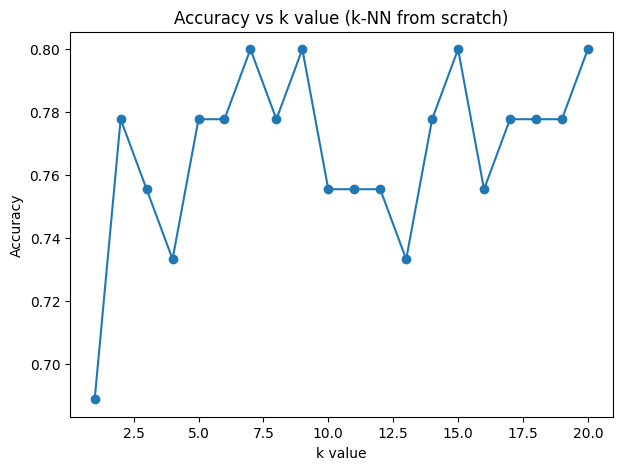

In [19]:
# Test the k-NN implementation on the test set
k_values = range(1, 21)
accuracy_scores_scratch = []

for k in k_values:
    y_pred_scratch = [predict_knn(X_train, y_train, x_test, k) for x_test in X_test]
    accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
    accuracy_scores_scratch.append(accuracy_scratch)

best_k = k_values[np.argmax(accuracy_scores_scratch)]
y_pred_scratch_best_k = [predict_knn(X_train, y_train, x_test, best_k) for x_test in X_test]

# Calculate accuracy for the best k
accuracy_scratch_best_k = accuracy_score(y_test, y_pred_scratch_best_k)*100

print(f'Best k: {best_k}')
print('Accuracy (scratch) '+str(round(accuracy_scratch_best_k, 2))+'%.')

# Plot accuracy vs k value for scratch implementation
plt.figure(figsize=(7, 5))
plt.plot(k_values, accuracy_scores_scratch, marker='o')
plt.title('Accuracy vs k value (k-NN from scratch)')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.show()

Accuracy (scikit-learn) 80.0 %.


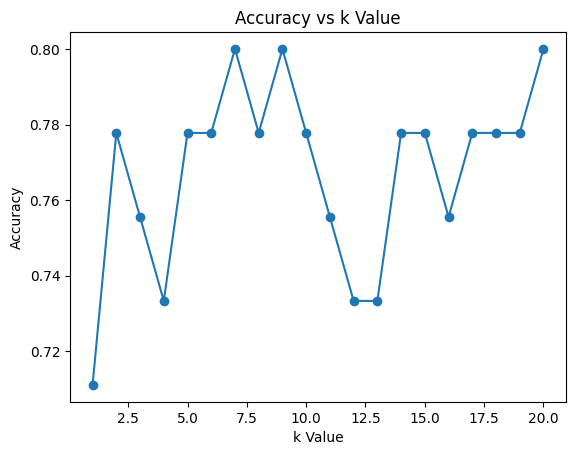

In [20]:
knn_sklearn = KNeighborsClassifier(n_neighbors=7)
knn_sklearn.fit(X_train, y_train)

# Predict on the test set
y_pred_sklearn = knn_sklearn.predict(X_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)*100
print('Accuracy (scikit-learn) '+str(round(accuracy_sklearn, 2))+ ' %.')

# Plotting accuracy vs k value
k_values = range(1, 21)
accuracy_values = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k Value')
plt.show()